连续数字均为了解进程运行！
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 随机森林
[[6 1 0 0 0 0 0]
 [0 6 1 0 0 0 0]
 [0 0 6 0 0 0 0]
 [0 0 0 5 1 0 0]
 [0 0 0 0 5 0 2]
 [0 1 0 0 1 3 0]
 [0 0 0 0 0 0 5]]
Acc:  0.8372093023255814
Precision:  0.8622448979591837
Recall:  0.8374149659863945


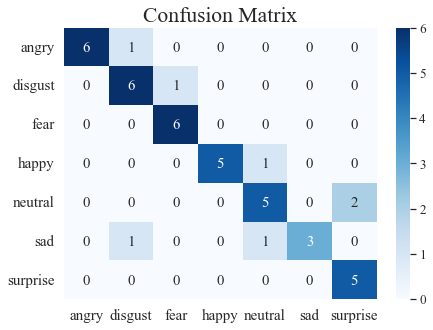

1 True  2 True  3 True  4 True  5 True  6 True  7 True  8 True  9 True  10 True  11 True  12 False  13 False  14 False  15 False  16 True  17 False  18 True  19 False  20 False  21 True  22 True  23 True  24 True  25 True  26 True  27 True  28 False  29 True  30 True  31 True  32 False  33 True  34 False  35 True  36 True  37 True  38 False  39 True  40 True  41 True  42 True  43 True  正确率: 0.7441860465116279


In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import sklearn
import seaborn

from skimage.feature import hog
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from skimage import io
from PIL import Image
from sklearn.naive_bayes import GaussianNB

from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data, io,data_dir,filters, feature
from skimage.color import label2rgb
import skimage
from sklearn.decomposition import PCA  

from PIL import Image


print("连续数字均为了解进程运行！")
# 训练部分的hog特征提取
def extract_hog_features(X):
    image_descriptors = []
    for i in range(len(X)):  # 此处的X为之前训练部分所有图像的矩阵形式拼接而来，所以len(X)实为X中矩阵的个数，即训练部分图像的个数
        print(i, end=" " )  # 方便了解程序进程
        fd, _ = hog(X[i], orientations=9, pixels_per_cell=(16, 16), cells_per_block=(16, 16),
                    block_norm='L2-Hys', visualize=True)
        # orientations：int，可选⽅向箱的数量。
        # pixels_per_cell：2元组(int，int)，可选的单元格⼤⼩（以像素为单位）。
        # cells_per_block：2元组(int，int)，可选每个块中的单元格数。
        # block_norm：str {‘L1’，‘L1-sqrt’，‘L2’，‘L2-Hys’}，可选
        image_descriptors.append(fd)  # 拼接得到所有图像的hog特征
    return image_descriptors  # 返回的是训练部分所有图像的hog特征


# 预测部分单张图像的hog特征提取
def extract_hog_features_single(X):
    image_descriptors_single = []
    fd, _ = hog(X, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(16, 16),
                block_norm='L2-Hys', visualize=True)
    image_descriptors_single.append(fd)
    return image_descriptors_single

# 训练部分数据读取
def read_data(label2id):  # label2id为定义的标签
    X = []
    Y = []
    path = r'D:\IE_Donwload\jaffe_class_ready\traning_set'
    for label in os.listdir(path):  # os.listdir用于返回指定的文件夹包含的文件或文件夹的名字的列表，此处遍历每个文件夹
        for img_file in os.listdir(os.path.join(path, label)):  # 遍历每个表情文件夹下的图像
            image = cv2.imread(os.path.join(path, label, img_file))  # 读取图像
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            result = image / 255.0  # 图像归一化
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            X.append(result)  # 将读取到的所有图像的矩阵形式拼接在一起
            Y.append(label2id[label])  # 将读取到的所有图像的标签拼接在一起
    return X, Y  # 返回的X,Y分别是图像的矩阵表达和图像的标签


label2id = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
X, Y = read_data(label2id)#读数据函数调用
X_features = extract_hog_features(X)#提取hog特征值函数调用

X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size=0.25, random_state=42)


# 选择分类算法,temp选择类别,不选择参数默认随机森林
temp=5
if temp==0:
    #svm算法
    #svm = sklearn.svm.SVC(C = 10, kernel='linear') # acc = 0.9
    svm =sklearn.svm.SVC(C=2, kernel='rbf', gamma=10, decision_function_shape='ovr')      #acc=0.9534
    svm.fit(X_train, Y_train)
    Y_predict = svm.predict(X_test)
    print("svm算法")
elif temp==1:
    #knn算法
    knn = KNeighborsClassifier(n_neighbors=1)     #0.93
    knn.fit(X_train,Y_train)
    print(knn)
    print('测试数据集得分：{:.2f}'.format(knn.score(X_test,Y_test)))
    Y_predict = knn.predict(X_test)
    print("knn算法")
elif temp==2:
    #决策树算法   0.3+
    tree_D = DecisionTreeClassifier()
    tree_D.fit(X_train, Y_train)
    Y_predict = tree_D.predict(X_test)
    print("")
elif temp==3:
    #朴素贝叶斯分类   0.67+
    mlt=GaussianNB()
    mlt.fit(X_train, Y_train)
    Y_predict = mlt.predict(X_test)
    print("决策树算法")
elif temp==4:
    #逻辑回归分类  0.488
    logistic = LogisticRegression()
    logistic.fit(X_train, Y_train)
    Y_predict = logistic.predict(X_test)
    print("逻辑回归分类")
else:
    # 随机森林    0.87
    Forest = RandomForestClassifier(n_estimators=180, random_state=0)
    Forest.fit(X_train, Y_train)
    Y_predict = Forest.predict(X_test)
    print("随机森林")

acc = accuracy_score(Y_test, Y_predict)#分类准确率
precision = precision_score(Y_test, Y_predict, average='macro')#精度
recall = recall_score(Y_test, Y_predict, average='macro')#召回率
cm = confusion_matrix(Y_test, Y_predict)
print(cm)
print('Acc: ', acc)
print('Precision: ', precision)
print('Recall: ', recall)

xtick = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
ytick = xtick
f, ax = plt.subplots(figsize=(7, 5))
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
seaborn.set(font_scale=1.2)
plt.rc('font', family='Times New Roman', size=15)
seaborn.heatmap(cm, fmt='g', cmap='Blues', annot=True, cbar=True, xticklabels=xtick, yticklabels=ytick, ax=ax)
plt.title('Confusion Matrix', fontsize='x-large')
plt.show()


# 下面为同一文件夹下多张图片的表情识别
labelid2 = {0:'angry',1: 'disgust',2: 'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}
i = 1
dirpath=r"D:\IE_Donwload\jaffe_class_ready\testing_set"
count=0
rightcount=0
falsecount=0
for image_file in os.listdir(dirpath):
    for img_file in os.listdir(os.path.join(dirpath, image_file)):  # 遍历每个表情文件夹下的图像
        image = cv2.imread(os.path.join(dirpath, image_file, img_file))  # 读取图像     
        image = np.array(image)     #转化为array格式
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#转为灰度图
        result = image / 255.0

        cv2.waitKey(0)
        cv2.destroyAllWindows()

        X_Single = extract_hog_features_single(result)#提取单个图片的hog特征
        #temp变量为上面选择的算法
        if temp==0:predict = svm.predict(X_Single)#svm算法
        elif temp==1:predict = knn.predict(X_Single)  # KNN
        elif temp==2:predict = tree_D.predict(X_Single)#决策树算法
        elif temp==3:predict = mlt.predict(X_Single)#朴素贝叶斯分类
        elif temp==4:predict = logistic.predict(X_Single)#逻辑回归分类
        else:predict = Forest.predict(X_Single)  # 随机森林        

        print(i, end=" " )
        i += 1
        if labelid2[int(predict)][:] in image_file:
            print("True",end='  ')
            rightcount=rightcount+1
        else:
            print("False",end='  ')
            falsecount=falsecount+1
        count=count+1
print("正确率:",rightcount/count)